<a href="https://colab.research.google.com/github/Luensmann/Bachelorarbeit/blob/main/Evaluation/Eval_tmvar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import AutoTokenizer, BertForTokenClassification, AutoModelForTokenClassification
from datasets import load_dataset

In [ ]:
saveName = "2e-05_0404_ES6_strict_tok1"
model = "Brizape/tmvar_" + saveName

tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForTokenClassification.from_pretrained(model)

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/706k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
dataset = load_dataset("Brizape/tmvar_tokenized_split_0404_dev")
dataset

Found cached dataset parquet (C:/Users/pc/.cache/huggingface/datasets/Brizape___parquet/Brizape--tmvar_tokenized_split_0404_dev-3b41f35c1b43fb07/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 801
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 201
    })
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 498
    })
})

In [ ]:
# labels

label_list = ["O", "B-DNAMutation", "I-DNAMutation", "B-ProteinMutation", "I-ProteinMutation", "B-SNP", "I-SNP"]

id2label = {
    0: "O",
    1: "B-DNAMutation",
    2: "I-DNAMutation",
    3: "B-ProteinMutation",
    4: "I-ProteinMutation",
    5: "B-SNP",
    6: "I-SNP",
}
label2id = {
    "O": 0,
    "B-DNAMutation": 1,
    "I-DNAMutation": 2,
    "B-ProteinMutation": 3,
    "I-ProteinMutation": 4,
    "B-SNP": 5,
    "I-SNP": 6,
}

In [ ]:
# gold_id_all - expected outputs in ids-format
# gold_label_all - expected outputs in label-format
# pred_label_all - all predicted labels in label-format
# pred_id_all - all predicted labels in id-format

# del all missmatches in both list:
# gold_id - expected outputs in ids-format
# gold_label - expected outputs in label-format
# pred_label - all predicted labels in label-format
# pred_id - all predicted labels in id-format

# y_true - for sklearn, no sublists
# y-pred - for sklearn, no sublists

In [ ]:
# get all texts for predictions

texts = []
for item in dataset["test"]:
    texts.append(item["texts"])
len(texts)

498

In [ ]:
# get all gold labels aka true labels

gold_id_all = []
for item in dataset["test"]:
    gold_id_all.append(item["labels"][1:-1])
len(gold_id_all)

498

In [ ]:
# convert all IDs into labels

gold_label_all = []
for item in gold_id_all:
    gold_label_all.append([id2label[i] for i in item])
len(gold_label_all)

498

In [ ]:
def predict(text):
    
    inputs = tokenizer(text, add_special_tokens=False, return_tensors="pt", truncation=True, max_length=512)
    if inputs['input_ids'].numel() == 0:
        print("input_ids is empty")
        return []
    
    with torch.no_grad():
        logits = model(**inputs).logits 
    predictions = torch.argmax(logits, dim=2)
    
    predicted_token_class = [model.config.id2label[t.item()] for t in predictions[0]]

    return predicted_token_class

In [ ]:
# predict all text
pred_label_all = []
for index, text in enumerate(texts):
    print(index, end=' ')
    pred_label_all.append(predict(text))
len(pred_label_all)



0 1 2 input_ids is empty
3 4 5 input_ids is empty
6 7 8 input_ids is empty
9 10 11 input_ids is empty
12 13 14 input_ids is empty
15 16 17 input_ids is empty
18 19 20 input_ids is empty
21 22 23 input_ids is empty
24 25 26 input_ids is empty
27 28 29 input_ids is empty
30 31 32 input_ids is empty
33 34 35 input_ids is empty
36 37 38 input_ids is empty
39 40 41 input_ids is empty
42 43 44 input_ids is empty
45 46 47 input_ids is empty
48 49 50 input_ids is empty
51 52 53 input_ids is empty
54 55 56 input_ids is empty
57 58 59 input_ids is empty
60 61 62 input_ids is empty
63 64 65 input_ids is empty
66 67 68 input_ids is empty
69 70 71 input_ids is empty
72 73 74 input_ids is empty
75 76 77 input_ids is empty
78 79 80 input_ids is empty
81 82 83 input_ids is empty
84 85 86 input_ids is empty
87 88 89 input_ids is empty
90 91 92 input_ids is empty
93 94 95 input_ids is empty
96 97 98 input_ids is empty
99 100 101 input_ids is empty
102 103 104 input_ids is empty
105 106 107 input_ids is 

498

In [ ]:
# delete all special token
for i, pred in enumerate(pred_label_all):
    if len(pred) == 512:
        pred_label_all[i] = pred[1:-1]

In [ ]:
# convert all IDs into labels
pred_id_all = []
for item in pred_label_all:
    pred_id_all.append([label2id[i] for i in item])
len(pred_id_all)

498

In [ ]:
# checking if all gold and pred are same len
# reutrn list with indices of all missmatches
def check_len(gold, pred):
    missmatch_index = []
    for index, (gold, pred) in enumerate(zip(gold, pred)):
        if len(gold)==len(pred):
            #print("yes")
            continue
        else:
            missmatch_index.append(index)
    print("indices to del:" + str(missmatch_index))
    return missmatch_index

In [ ]:
# delete all missmatches from both sets
def del_missmatches(list1, list2, indices_to_del):
    for index in sorted(indices_to_del, reverse=True):
            del list1[index]
            del list2[index]

In [ ]:
# copy _all files
gold_id = gold_id_all[:] 
gold_label = gold_label_all[:]
pred_id = pred_id_all[:]
pred_label = pred_label_all[:]
all = [gold_id, gold_label, pred_id, pred_label]
print('len befor:')
for listi in all:
    print(len(listi))
# get indicies with missmatch
# and delete them from both sets
indices_to_del = check_len(gold_id, pred_id)
del_missmatches(gold_id , pred_id, indices_to_del)
del_missmatches(gold_label , pred_label, indices_to_del)
print('len after:')
for listi in all:
    print(len(listi))
    


len befor:
498
498
498
498
indices to del:[]
len after:
498
498
498
498


In [ ]:
print(len(dataset['test']['input_ids'][0][1:-1]))
print(len(gold_label[0]))

27
27


In [ ]:
i = 0
for (pred, gold, inIDs) in zip(pred_label, gold_label, dataset['test']['input_ids']):
    print(i, len(pred), len(inIDs[1:-1]), end="\n")
    i = i+1
    for i, (label1, label2, inID) in enumerate(zip(pred, gold, inIDs[1:-1])):
        print(i, tokenizer.decode(inID), ":(" + str(label1), ",", label2 + ')')
        if label1 != label2:
            print("#########################")
            #print(":(" + str(label1), ",", label2, end=')\n')
    print(" ")

In [ ]:
############################################################
######################### seqeval ##########################
############################################################

In [ ]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from seqeval.scheme import IOB2

In [ ]:
# generate metrics
print("\n")
print("-"*60 + "\n" + "    SeqEval strict\n" + "-"*60)
print("strict: \n" + classification_report(gold_label, pred_label,  mode='strict'))
print("\n")
print("-"*60 + "\n" + "    SeqEval default\n" + "-"*60)
print("default: \n" + classification_report(gold_label, pred_label))



------------------------------------------------------------
    SeqEval strict
------------------------------------------------------------
strict: 
                 precision    recall  f1-score   support

    DNAMutation       0.82      0.78      0.80       220
ProteinMutation       0.93      0.85      0.89       205
            SNP       0.95      0.95      0.95        39

      micro avg       0.88      0.83      0.85       464
      macro avg       0.90      0.86      0.88       464
   weighted avg       0.88      0.83      0.85       464



------------------------------------------------------------
    SeqEval default
------------------------------------------------------------
default: 
                 precision    recall  f1-score   support

    DNAMutation       0.72      0.79      0.75       220
ProteinMutation       0.90      0.86      0.88       205
            SNP       0.95      0.95      0.95        39

      micro avg       0.81      0.84      0.82       464
     

In [ ]:
# save reports as csv
import pandas as pd
report = pd.DataFrame(classification_report(gold_label, pred_label, mode='strict', digits=2, output_dict=True)).transpose()
print(report)
df = pd.DataFrame(report)#.transpose()
# With a Sheet Name
file_name = "tmvar" + saveName
report.to_excel('tmvar\ ' + saveName + '.xlsx', index=True)

                 precision    recall  f1-score  support
DNAMutation       0.818182  0.777273  0.797203    220.0
ProteinMutation   0.930851  0.853659  0.890585    205.0
SNP               0.948718  0.948718  0.948718     39.0
micro avg         0.878440  0.825431  0.851111    464.0
macro avg         0.899250  0.859883  0.878835    464.0
weighted avg      0.878932  0.825431  0.851195    464.0


PermissionError: [Errno 13] Permission denied: 'tmvar\\ 2e-05_0404_ES6_strict_tok1.xlsx'

In [ ]:
#######################################################
####################### sklearn #######################
#######################################################

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
import evaluate

In [ ]:
y_pred = []
for sublist in pred_id:
    for label in sublist:
        y_pred.append(label)
len(y_pred)

53340

In [ ]:
y_true = []
for sublist in gold_id:
    for label in sublist:
        y_true.append(label)
len(y_true)

53340

In [ ]:
print(unique_labels(y_pred))
print(unique_labels(y_true))

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


In [ ]:
confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6])

array([[51073,    12,    63,     5,    15,     0,     2],
       [   35,   180,     4,     1,     0,     0,     0],
       [   84,     3,   931,     0,     2,     0,     0],
       [    6,    14,     0,   182,     3,     0,     0],
       [   16,     0,    39,     0,   516,     0,     0],
       [    0,     0,     0,     0,     0,    39,     0],
       [    0,     0,     0,     0,     0,     0,   115]], dtype=int64)

In [ ]:
def plot(freal, predicted_token_class, label_list):
    label_names = label_list #unique_labels(y_true)
    columns = [f'{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6]), columns=columns, index=index)
    return table

In [ ]:
plot = plot(y_true, y_pred, label_list)
print(plot)
df = pd.DataFrame(plot)#.transpose()
df.to_excel('tmvar\ ' + saveName + 'confusion_.xlsxa', index=True)

                       O  B-DNAMutation  I-DNAMutation  B-ProteinMutation  \
O                  51073             12             63                  5   
B-DNAMutation         35            180              4                  1   
I-DNAMutation         84              3            931                  0   
B-ProteinMutation      6             14              0                182   
I-ProteinMutation     16              0             39                  0   
B-SNP                  0              0              0                  0   
I-SNP                  0              0              0                  0   

                   I-ProteinMutation  B-SNP  I-SNP  
O                                 15      0      2  
B-DNAMutation                      0      0      0  
I-DNAMutation                      2      0      0  
B-ProteinMutation                  3      0      0  
I-ProteinMutation                516      0      0  
B-SNP                              0     39      0  
I-SNP       

ValueError: No engine for filetype: 'xlsxa'

In [ ]:
def plot_heat(freal, predicted_token_class, label_list):
    label_names = label_list #unique_labels(y_true)
    columns = [f'{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels= [0,1,2,3,4,5,6]), columns=columns, index=index)
    figsize=(25,20)
    return sns.heatmap(table, annot=True, fmt='d', linewidth=.1, vmax=1000, cmap='YlOrBr')

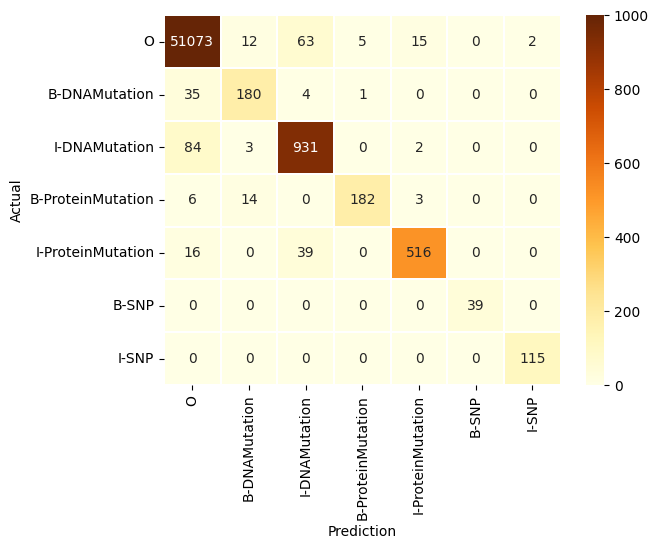

In [ ]:
ax = plot_heat(y_true, y_pred, label_list)
ax.set(xlabel="Prediction", ylabel="Actual")
ax.figure.savefig("output.png")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
exl = pd.DataFrame()


report = classification_report(y_true, y_pred, labels=[i for i in range(7)], target_names = label_list, output_dict=True)
print(report)
df = pd.DataFrame(report).transpose()
print("\n")
print("-"*60 + "\n" + "    Label Report\n" + "-"*60)
print(df)
exl = exl.append(df, ignore_index=True)
exl.to_excel('tmvar\ ' + saveName + '_labelReport.xlsx', index=True)#.transpose()

{'O': {'precision': 0.9972468465653923, 'recall': 0.9981043580222787, 'f1-score': 0.9976754180340678, 'support': 51170}, 'B-DNAMutation': {'precision': 0.861244019138756, 'recall': 0.8181818181818182, 'f1-score': 0.8391608391608392, 'support': 220}, 'I-DNAMutation': {'precision': 0.8977820636451301, 'recall': 0.9127450980392157, 'f1-score': 0.9052017501215361, 'support': 1020}, 'B-ProteinMutation': {'precision': 0.9680851063829787, 'recall': 0.8878048780487805, 'f1-score': 0.9262086513994912, 'support': 205}, 'I-ProteinMutation': {'precision': 0.9626865671641791, 'recall': 0.9036777583187391, 'f1-score': 0.9322493224932249, 'support': 571}, 'B-SNP': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 39}, 'I-SNP': {'precision': 0.9829059829059829, 'recall': 1.0, 'f1-score': 0.9913793103448275, 'support': 115}, 'accuracy': 0.9943007124109486, 'macro avg': {'precision': 0.9528500836860598, 'recall': 0.9315019872301189, 'f1-score': 0.9416964702219982, 'support': 53340}, 'weighte

C:\Users\pc\AppData\Local\Temp\ipykernel_21068\2431995263.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  exl = exl.append(df, ignore_index=True)


In [ ]:
i = 0
for (pred, gold, inIDs) in zip(pred_label, gold_label, dataset['test']['input_ids']):
    print(i, len(pred), len(inIDs[1:-1]), end="\n")
    i = i+1
    for i, (label1, label2, inID) in enumerate(zip(pred, gold, inIDs[1:-1])):
        print(i, tokenizer.decode(inID), ":(" + str(label1), ",", label2 + ')')
        if label1 != label2:
            print("#########################")
            #print(":(" + str(label1), ",", label2, end=')\n')
    print(" ")
    